In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
# import cufflinks
# cufflinks.go_offline()
# from plotly.offline import iplot
# import plotly.plotly as py
# import plotly.graph_objs as go
import nltk
nltk.download('words')
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer,LancasterStemmer
import re
wordss =nltk.corpus.words.words()
stemmer = SnowballStemmer('english')
# stemmer1 = PorterStemmer()
# stemmer2 = LancasterStemmer()
# lemmatizer = WordNetLemmatizer()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pickle
df =pickle.load(open('/content/drive/My Drive/NewsClassifier/News_data_with_length','rb'))

In [0]:
df['info_concat'] = df['information'] +' '+df['authors']
def sentence_len(text):
  return len(text.split())
df['concat_length'] = df.info_concat.apply(sentence_len)
df.groupby('category').concat_length.describe()

In [0]:
# def clean_text(text):
#   text = re.sub(r"@[A-Za-z0-9]+"," ",text) # remove @usernames
#   text = re.sub(r"https?://[A-Za-z0-9./]+"," ",text) #remove https links
#   text = re.sub(r"[^A-Za-z.!?']"," ",text)  # keep only letters and few punctuations
#   text = re.sub(r" +"," ",text) # remove extra spaces
#   text = text.lower()
#   return text
#   df['processed_input'] = df.info_concat.apply(clean_text)

In [0]:
# def remove_stop(msg):
#     nopunc = msg.split()
#     clean = [word for word in nopunc if word.lower() not in stopwords.words('english')]
#     clean = " ".join(clean)
#     return clean

##### Removed stop words input is dumped

In [0]:
df['input'] = new_input
df['final_length'] = df.input.apply(sentence_len)
# df.groupby('category').final_length.describe()
MAX_LEN = 40
df_new = df.drop(df[df.final_length>MAX_LEN].index)
df_new.drop(['headline','short_description','headline_length','short_description_length','info_length','info_concat','information'],axis=1,inplace=True)
# df_new.info()
df_new.groupby('category').final_length.describe()

In [0]:
df_new.head(2)

,category,authors,concat_length,processed_input,input,final_length
0,CRIME,Melissa Jeltsen,29,there were mass shootings in texas last week b...,mass shootings texas last week tv. left husban...,15
1,ENTERTAINMENT,Andy McDonald,22,will smith joins diplo and nicky jam for the w...,smith joins diplo nicky jam world cup's offici...,13


###### MAX LENGTH IS **40**

In [0]:
import pickle
X,y =pickle.load(open('/content/drive/My Drive/NewsClassifier/final_dataset','rb'))

### Feature Representation and Reduction

In [0]:
bowt = CountVectorizer(ngram_range=(1,1),stop_words='english',max_features=2000).fit(X) #min_df=20,max_df=0.5
bowc = bowt.transform(X)
target = y
print(bowc.shape)
print(target.shape)

(189577, 2000)
(189577,)


In [0]:
from sklearn.decomposition import TruncatedSVD
svd1600 = TruncatedSVD(n_components=1600, n_iter=1, random_state=42)
svd1600.fit(bowc)

TruncatedSVD(algorithm='randomized', n_components=1600, n_iter=1,
             random_state=42, tol=0.0)

In [0]:
reduced_X= svd1600.transform(bowc)
reduced_X.shape

(189577, 1600)

### Visualise using SVD

In [0]:
from sklearn.decomposition import TruncatedSVD
svd2 = TruncatedSVD(n_components=2, n_iter=1, random_state=42)
svd2.fit(bowc)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=1, random_state=42,
             tol=0.0)

In [0]:
red2_x = svd2.transform(bowc)
red2_x.T.shape

(2, 189577)

In [0]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(red2_x)
# red2_x_scaled = scaler.transform(red2_x)

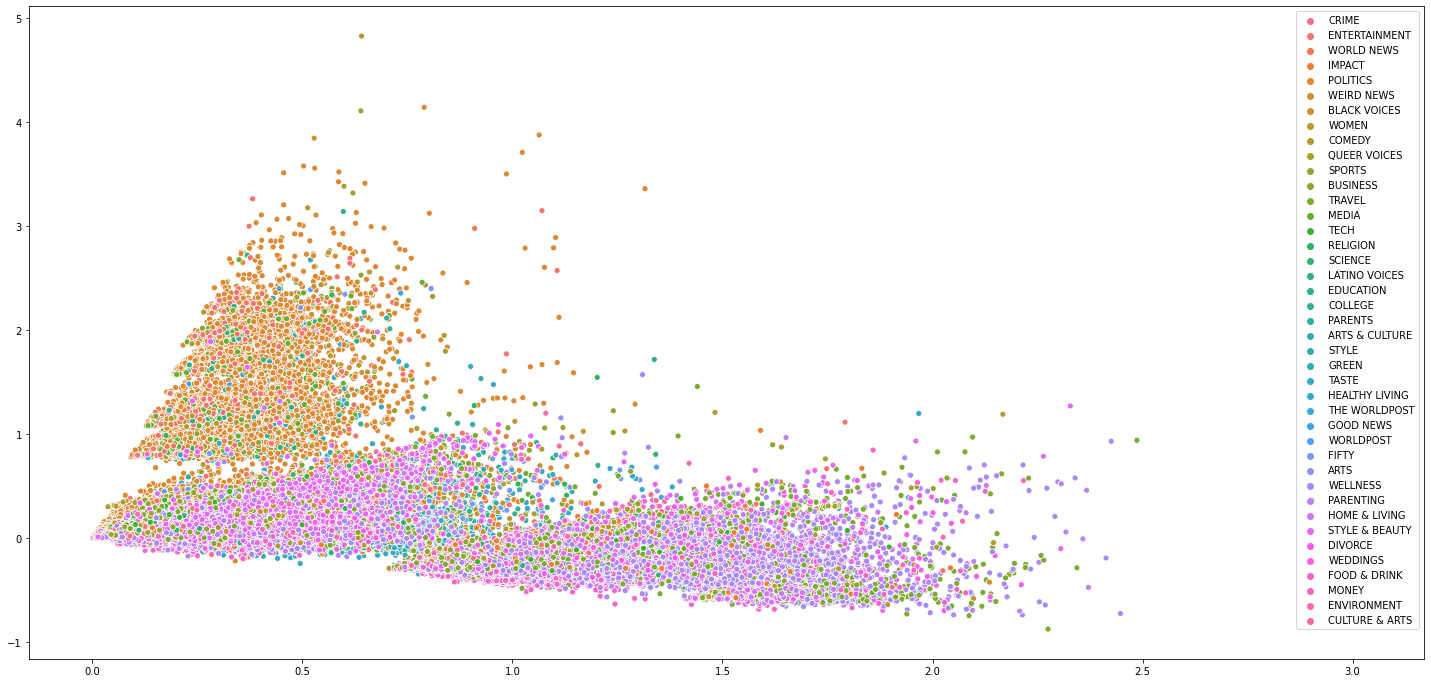

In [0]:
plt.figure(figsize=(25,12))
sns.scatterplot(red2_x.T[0],red2_x.T[1],hue=target)

### SPLITTING OF DATA and TRAIN

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
skf = StratifiedShuffleSplit(n_splits=2,test_size=0.2)
skf.get_n_splits(reduced_X,target )

2

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [0]:
from sklearn.metrics import accuracy_score
accuracy=[]
target= y
for train_index,test_index in skf.split(reduced_X,target):
  print("TRAIN:", train_index, "TEST:", test_index)
  #print(len(train_index))
  X_train,X_test = reduced_X[train_index], reduced_X[test_index]
  Y_train,Y_test = target[train_index], target[test_index]

  model.fit(X_train,Y_train)
  predictions = model.predict(X_test)
  score = accuracy_score(predictions,Y_test)
  print("SCORE is",score)
  accuracy.append(score)
print(np.array(accuracy).mean())


TRAIN: [182100  12901   9756 ... 182471  13502 154223] TEST: [171095 157487 124112 ... 125977  55969  10136]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SCORE is 0.656925836058656
TRAIN: [ 29356  64497 118772 ...  21813  15145  60650] TEST: [172565   9086 115798 ...  91864 108258 120859]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SCORE is 0.6546840384006751
0.6558049372296655


##### 1500 dim,BOW --> 0.5964173063731475 ; min_df=20,max_df=0.5
##### 1500 dim,BOW --> 0.6548554699862854 ; max_features=2000
##### 1600 dim,BOW --> 0.6558049372296655 ; max_features=2000


In [0]:
reduced_X.shape

(189577, 1600)

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)

In [0]:
from sklearn.metrics import accuracy_score
accuracy=[]
# target= df_new.category
target =y
for train_index,test_index in skf.split(reduced_X,target):
  print("TRAIN:", train_index, "TEST:", test_index)
  #print(len(train_index))
  X_train,X_test = reduced_X[train_index], reduced_X[test_index]
  Y_train,Y_test = target[train_index], target[test_index]

  model.fit(X_train,Y_train)
  predictions = model.predict(X_test)
  score = accuracy_score(predictions,Y_test)
  print("SCORE is",score)
  accuracy.append(score)
print(np.array(accuracy).mean())


TRAIN: [134626 173014  47105 ...  97826 133593 157132] TEST: [   494  94282 187749 ...  28907  50889  27639]
SCORE is 0.174464605971094
TRAIN: [93976 50989 74294 ... 16863 84821 55677] TEST: [ 94309 134922  45265 ... 108450 112174 143994]
SCORE is 0.17557231775503745
0.17501846186306574


1500 BOW --> Random forest --> 0.17501846 ; max_features =2000